In [ ]:
!pip install PyMySQL

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

connection = pymysql.connect(
host = "dsc140.cmgtlybtlnmh.us-east-2.rds.amazonaws.com",
user = "guest",
password = "UMUdsc140",
db="orders")
conn = connection.cursor()

In [ ]:
sql_command = "SHOW TABLES"
# conn.execute does the command in the ()
conn.execute(sql_command)
vals = conn.fetchall()
for i in vals:
  print(i)

('categories',)
('customers',)
('employees',)
('orders',)
('ordersdetails',)
('products',)
('shippers',)
('suppliers',)


The data appears to be about a buisnesses assets

In [ ]:
sql_command2 = "SHOW COLUMNS FROM ordersdetails"
output = conn.execute(sql_command2)
vals = conn.fetchall()
col_names = [i[0] for i in vals]
print(col_names)

['OrderDetailID', 'OrderID', 'ProductID', 'Quantity']


In [ ]:
sql_quantity = "SELECT * FROM ordersdetails"
output = conn.execute(sql_quantity)
vals = conn.fetchall()
print(vals)

((1, 10248, 11, 12), (2, 10248, 42, 10), (3, 10248, 72, 5), (4, 10249, 14, 9), (5, 10249, 51, 40), (6, 10250, 41, 10), (7, 10250, 51, 35), (8, 10250, 65, 15), (9, 10251, 22, 6), (10, 10251, 57, 15), (11, 10252, 20, 40), (12, 10252, 33, 25), (13, 10252, 60, 40), (14, 10253, 31, 20), (15, 10253, 39, 42), (16, 10253, 49, 40), (17, 10254, 24, 15), (18, 10254, 55, 21), (19, 10254, 74, 21), (20, 10255, 2, 20), (21, 10255, 16, 35), (22, 10255, 36, 25), (23, 10255, 59, 30), (24, 10256, 53, 15), (25, 10256, 77, 12), (26, 10257, 27, 25), (27, 10257, 39, 6), (28, 10257, 77, 15), (29, 10258, 2, 50), (30, 10258, 5, 65), (31, 10258, 32, 6), (32, 10259, 21, 10), (33, 10259, 37, 1), (34, 10260, 41, 16), (35, 10260, 57, 50), (36, 10260, 62, 15), (37, 10260, 70, 21), (38, 10261, 21, 20), (39, 10261, 35, 20), (40, 10262, 5, 12), (41, 10262, 7, 15), (42, 10262, 56, 2), (43, 10263, 16, 60), (44, 10263, 24, 28), (45, 10263, 30, 60), (46, 10263, 74, 36), (47, 10264, 2, 35), (48, 10264, 41, 25), (49, 10265, 1

In [ ]:
quantity_df = pd.DataFrame(vals, columns = col_names)
quantity_df
print(quantity_df['Quantity'])

0      12
1      10
2       5
3       9
4      40
       ..
194     4
195    21
196    70
197    30
198    40
Name: Quantity, Length: 199, dtype: int64


In [ ]:
sql_command3 = "SHOW COLUMNS FROM products"
output = conn.execute(sql_command3)
vals = conn.fetchall()
col_names2 = [i[0] for i in vals]
print(col_names2)

['ProductID', 'ProductName', 'SuppliersID', 'CategoryID', 'Unit', 'Price']


In [ ]:
sql_products = "SELECT * FROM products"
output = conn.execute(sql_products)
vals = conn.fetchall()
print(vals)

((1, 'Chais', 1, 1, '10 boxes x 20 bags', 18.0), (2, 'Chang', 1, 1, '24 - 12 oz bottles', 19.0), (3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10.0), (4, 'Chef Antons Cajun Seasoning', 2, 2, '48 - 6 oz jars', 22.0), (5, 'Chef Antons Gumbo Mix', 2, 2, '36 boxes', 21.35), (6, 'Grandmas Boysenberry Spread', 3, 2, '12 - 8 oz jars', 25.0), (7, 'Uncle Bobs Organic Dried Pears', 3, 7, '12 - 1 lb pkgs.', 30.0), (8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40.0), (9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97.0), (10, 'Ikura', 4, 8, '12 - 200 ml jars', 31.0), (11, 'Queso Cabrales', 5, 4, '1 kg pkg.', 21.0), (12, 'Queso Manchego La Pastora', 5, 4, '10 - 500 g pkgs.', 38.0), (13, 'Konbu', 6, 8, '2 kg box', 6.0), (14, 'Tofu', 6, 7, '40 - 100 g pkgs.', 23.25), (15, 'Genen Shouyu', 6, 2, '24 - 250 ml bottles', 15.5), (16, 'Pavlova', 7, 3, '32 - 500 g boxes', 17.45), (17, 'Alice Mutton', 7, 6, '20 - 1 kg tins', 39.0), (18, 'Carnarvon Tigers', 7, 8, '16 kg pkg.', 62.5), (19, 'Te

In [ ]:
products_df = pd.DataFrame(vals, columns = col_names2)
products_df
print(products_df['Price'])

0     18.00
1     19.00
2     10.00
3     22.00
4     21.35
      ...  
72    15.00
73    10.00
74     7.75
75    18.00
76    13.00
Name: Price, Length: 77, dtype: float64


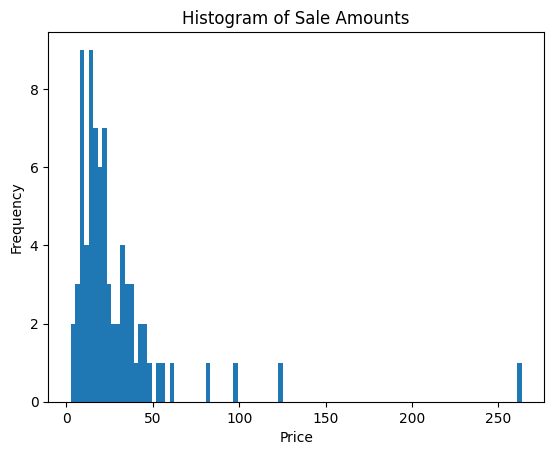

In [ ]:
plt.hist(products_df['Price'], bins = 100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Amounts')
plt.show()

## 4

In [ ]:
sql_command3 = "SHOW COLUMNS FROM employees"
output = conn.execute(sql_command3)
vals = conn.fetchall()
col_names = [i[0] for i in vals]
print(col_names)

['EmployeeID', 'LastName', 'FirstName', 'BirthDate', 'Photo', 'Notes']


In [ ]:
sql_EmployeeID = "SELECT * FROM employees"
output = conn.execute(sql_EmployeeID)
vals = conn.fetchall()
print(vals)

((1, 'Davolio', 'Nancy', datetime.date(1968, 12, 8), 'EmpID1.pic', 'Education includes a BA in psychology from Colorado State University. She also completed (The Art of the Cold Call). Nancy is a member of Toastmasters International.'), (2, 'Fuller', 'Andrew', datetime.date(1952, 2, 19), 'EmpID2.pic', 'Andrew received his BTS commercial and a Ph.D. in international marketing from the University of Dallas. He is fluent in French and Italian and reads German. He joined the company as a sales representative, was promoted to sales manager and was then named vice president of sales. Andrew is a member of the Sales Management Roundtable, the Seattle Chamber of Commerce, and the Pacific Rim Importers Association.'), (3, 'Leverling', 'Janet', datetime.date(1963, 8, 30), 'EmpID3.pic', 'Janet has a BS degree in chemistry from Boston College). She has also completed a certificate program in food retailing management. Janet was hired as a sales associate and was promoted to sales representative.')

In [ ]:
EmployeeID_df = pd.DataFrame(vals, columns = col_names)
EmployeeID_df
print(EmployeeID_df['EmployeeID'])

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: EmployeeID, dtype: int64


## 5

In [ ]:
sql_command4 = "SHOW COLUMNS FROM customers"
output = conn.execute(sql_command4)
vals = conn.fetchall()
col_names = [i[0] for i in vals]
print(col_names)

['CustomerID', 'CustomerName', 'ContractName', 'Address', 'City', 'PostalCode', 'Country']


In [ ]:
sql_CustomerC = "SELECT * FROM customers"
output = conn.execute(sql_CustomerC)
vals = conn.fetchall()
print(vals)

((1, 'Alfreds Futterkiste', 'Maria Anders', 'Obere Str. 57', 'Berlin', '12209', 'Germany'), (2, 'Ana Trujillo Emparedados y helados', 'Ana Trujillo', 'Avda. de la Constitución 2222', 'México D.F.', '05021', 'Mexico'), (3, 'Antonio Moreno Taquería', 'Antonio Moreno', 'Mataderos 2312', 'México D.F.', '05023', 'Mexico'), (4, 'Around the Horn', 'Thomas Hardy', '120 Hanover Sq.', 'London', 'WA1 1DP', 'UK'), (5, 'Berglunds snabbköp', 'Christina Berglund', 'Berguvsvägen 8', 'Luleå', 'S-958 22', 'Sweden'), (6, 'Blauer See Delikatessen', 'Hanna Moos', 'Forsterstr. 57', 'Mannheim', '68306', 'Germany'), (7, 'Blondel père et fils', 'Frédérique Citeaux', '24 place Kléber', 'Strasbourg', '67000', 'France'), (8, 'Bólido Comidas preparadas', 'Martín Sommer', 'C/ Araquil 67', 'Madrid', '28023', 'Spain'), (9, 'Bon app', 'Laurence Lebihans', '12 rue des Bouchers', 'Marseille', '13008', 'France'), (10, 'Bottom-Dollar Marketse', 'Elizabeth Lincoln', '23 Tsawassen Blvd.', 'Tsawassen', 'T2F 8M4', 'Canada'), 

In [ ]:
CustomerC_df = pd.DataFrame(vals, columns = col_names)
CustomerC_df
print(CustomerC_df['Country'])

0     Germany
1      Mexico
2      Mexico
3          UK
4      Sweden
       ...   
86    Finland
87     Brazil
88        USA
89    Finland
90     Poland
Name: Country, Length: 91, dtype: object


In [ ]:
sql_command5 = "SHOW COLUMNS FROM customers"
output = conn.execute(sql_command5)
vals = conn.fetchall()
col_names = [i[0] for i in vals]
print(col_names)

['CustomerID', 'CustomerName', 'ContractName', 'Address', 'City', 'PostalCode', 'Country']


In [ ]:
sql_CustomerName = "SELECT * FROM customers"
output = conn.execute(sql_CustomerName)
vals = conn.fetchall()
print(vals)

((1, 'Alfreds Futterkiste', 'Maria Anders', 'Obere Str. 57', 'Berlin', '12209', 'Germany'), (2, 'Ana Trujillo Emparedados y helados', 'Ana Trujillo', 'Avda. de la Constitución 2222', 'México D.F.', '05021', 'Mexico'), (3, 'Antonio Moreno Taquería', 'Antonio Moreno', 'Mataderos 2312', 'México D.F.', '05023', 'Mexico'), (4, 'Around the Horn', 'Thomas Hardy', '120 Hanover Sq.', 'London', 'WA1 1DP', 'UK'), (5, 'Berglunds snabbköp', 'Christina Berglund', 'Berguvsvägen 8', 'Luleå', 'S-958 22', 'Sweden'), (6, 'Blauer See Delikatessen', 'Hanna Moos', 'Forsterstr. 57', 'Mannheim', '68306', 'Germany'), (7, 'Blondel père et fils', 'Frédérique Citeaux', '24 place Kléber', 'Strasbourg', '67000', 'France'), (8, 'Bólido Comidas preparadas', 'Martín Sommer', 'C/ Araquil 67', 'Madrid', '28023', 'Spain'), (9, 'Bon app', 'Laurence Lebihans', '12 rue des Bouchers', 'Marseille', '13008', 'France'), (10, 'Bottom-Dollar Marketse', 'Elizabeth Lincoln', '23 Tsawassen Blvd.', 'Tsawassen', 'T2F 8M4', 'Canada'), 

In [ ]:
CustomerName_df = pd.DataFrame(vals, columns = col_names)
CustomerName_df
print(CustomerName_df['CustomerName'])

0                    Alfreds Futterkiste
1     Ana Trujillo Emparedados y helados
2                Antonio Moreno Taquería
3                        Around the Horn
4                     Berglunds snabbköp
                     ...                
86                        Wartian Herkku
87                Wellington Importadora
88                  White Clover Markets
89                                Wilman
90                                Wolski
Name: CustomerName, Length: 91, dtype: object


In [ ]:
merged_df = pd.merge(CustomerName_df, CustomerC_df, on='CustomerID')
merged_df

,CustomerID,CustomerName_x,ContractName_x,Address_x,City_x,PostalCode_x,Country_x,CustomerName_y,ContractName_y,Address_y,City_y,PostalCode_y,Country_y
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,Wartian Herkku,Pirkko Koskitalo,Torikatu 38,Oulu,90110,Finland,Wartian Herkku,Pirkko Koskitalo,Torikatu 38,Oulu,90110,Finland
87,88,Wellington Importadora,Paula Parente,Rua do Mercado 12,Resende,08737-363,Brazil,Wellington Importadora,Paula Parente,Rua do Mercado 12,Resende,08737-363,Brazil
88,89,White Clover Markets,Karl Jablonski,305 - 14th Ave. S. Suite 3B,Seattle,98128,USA,White Clover Markets,Karl Jablonski,305 - 14th Ave. S. Suite 3B,Seattle,98128,USA
89,90,Wilman,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland,Wilman,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland
